#                                         Group Assignment 18

In this project, we embark on the development and optimization of two distinct recommender system models: one based on neighborhood methods and the other on matrix factorization. Our primary goal is to enhance recommendation quality, achieved through a meticulous process of hyperparameter tuning. We rigorously evaluate the model performance against a baseline model.

PHASE 1:
The project commences with the loading of essential modules and libraries. Subsequently, we delve into an in-depth Exploratory Data Analysis (EDA) of the dataset 'data.' EDA is augmented by the utilization of charts and plots, which allow us to glean valuable insights from the dataset. Given the dataset's substantial size, we employ a stratification method to extract a representative sample. This sample is subjected to a similar EDA process, incorporating charts and plots, which unveil insights from the sampled data. Furthermore, we undertake a comparative analysis between the sampled and the original data to discern any similarities in their distributions.


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.6, rc={"lines.linewidth": 2})
import matplotlib.pyplot as plt

from surprise import Dataset
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
#import dask.dataframe as dd
from surprise.model_selection import GridSearchCV


In [9]:
file_path ="C:\\Users\\Nikos\\Documents\\0.MASTER DATA SCIENCE\\BLOCK 1\\Analysis of Customer Data\\PROJECT\\MovieLens-Ratings.csv"
data = pd.read_csv(file_path, na_values=-1)

The timestamp column in a recommendation dataset typically represents the time when a user made a particular rating or interaction with an item. While the timestamp information can be valuable for various purposes, such as analyzing user behavior and temporal patterns, it is often not used directly in recommender systems because of Sparsity.Including timestamps can significantly increase the sparsity of the user-item interaction matrix. In many recommendation scenarios, the user-item interaction matrix is already quite sparse, and adding timestamp data may make it even more challenging to build accurate models due to data scarcity.

In [10]:
data = data.drop(columns=['timestamp'])


In [11]:
data.head(n=-10)

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753429,283228,6377,5.0
27753430,283228,6874,4.0
27753431,283228,7072,5.0
27753432,283228,7091,4.5


In [12]:
#NUMBER OF USERS & MOVIES
percent_missing = data.isnull().sum() * 100 / len(data)
unique_users = len(data['userId'].unique())
unique_movie = len(data['movieId'].unique())
#unique_time = len(data['timestamp'].unique())


#PRINTING THE MISSING VALUES OF THE DATASET
print('missing values: ' + str(round(percent_missing['rating'], 2)) + '%')

#PRINTING THE TOTAL UNIQUE USERS THE DATASET
print('unique users: ' + str(unique_users))

#PRINTING THE UNIQUE MOVIES OF THE DATASET
print('unique movie: ' + str(unique_movie))

missing values: 0.0%
unique users: 283228
unique movie: 53889


The code snippet presented above is employed to derive informative observations from the dataset. It can be noticed that there are not missing values in the dataset. Moreover, we observe that there are 283,228 unique users and 53,889 movies

In [13]:
#GROUP THE DATA BY RATING AND COUNT THE MOVIES IN EACH GROUP
rating_counts = data['rating'].value_counts().sort_index()

#DISPLAY THE COUNTS FOR EACH RATING
print("Rating Counts:")
print(rating_counts)

Rating Counts:
0.5     442388
1.0     886233
1.5     441354
2.0    1850627
2.5    1373419
3.0    5515668
3.5    3404360
4.0    7394710
4.5    2373550
5.0    4071135
Name: rating, dtype: int64


The displayed results in the aforementioned output reveal the total number of ratings allocated to each distinct rating category.

# DISTRIBUTION OF RATINGS OF THE MOVIES

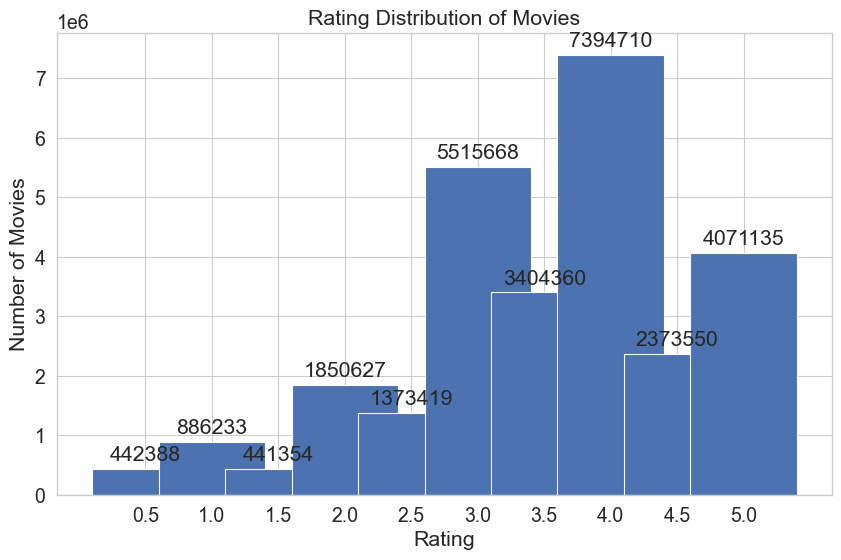

In [14]:
#WE GROUP THE DATA BY GROUP THE DATA BY RATING AND COUNT THE MOVIES IN EACH GROUP
#WE VISUALISE IT USING A BAR PLOT
rating_counts = data['rating'].value_counts().sort_index()

#Create a bar plot with frequency labels
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Rating Distribution of Movies')

#Add frequency labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(rating_counts.index)
plt.show()

In the provided plot, a comprehensive overview of the distribution of movie ratings becomes evident. Furthermore, the visualization enables us to discern the frequency of movies falling within each specific rating category. Notably, a rating of 4.0 emerges as the most prevalent, while a rating of 1.5 appears as the least common within the dataset.

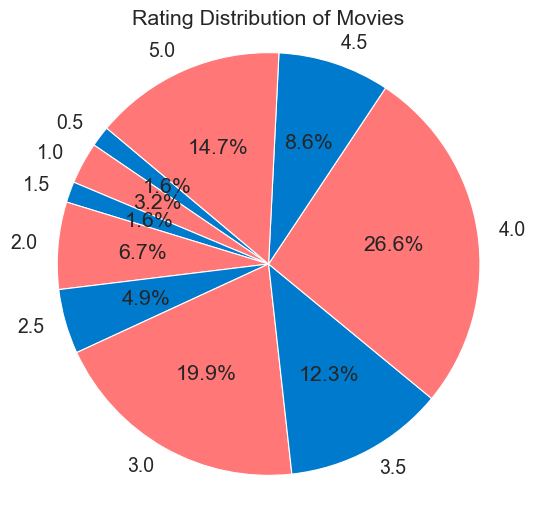

In [15]:
#WE GROUP THE DATA BY GROUP THE DATA BY RATING AND COUNT THE MOVIES IN EACH GROUP
#VISUALIZING USING A PIE CHART
rating_counts = data['rating'].value_counts().sort_index()

#Define colors (blue and light red)
colors = ['#007acc', '#ff7777']  # Blue and light red

#Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Rating Distribution of Movies')
plt.axis('equal')  
#Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The depicted pie chart offers a visual representation of the distribution of rating values as percentages within the overall rating dataset. As previously noted, a rating value of 4.0 holds the largest share, while a rating of 1.5 is less frequently observed. On the left-hand side of the pie chart, it is evident that ratings with values of 0.5, 1.0, 1.5, 2.0, and 2.5 collectively account for a relatively modest portion of the entire rating distribution.

# MOVIEID WITH THE MOST RATINGS FOR EACH RATING CATEGORY

In [16]:
#MOVIEID WITH THE MOST RATING FOR EACH RATING CATEGORY
#Group the data by 'movieId' and 'rating', and count the number of occurrences
rating_counts = data.groupby(['movieId', 'rating']).size().unstack(fill_value=0)

#Find the movie IDs with the most ratings for each rating level
most_rated_movies_5stars = rating_counts[5].idxmax()
most_rated_movies_4halfstars = rating_counts[4.5].idxmax()
most_rated_movies_4stars = rating_counts[4].idxmax()
most_rated_movies_3halfstars = rating_counts[3.5].idxmax()
most_rated_movies_3stars = rating_counts[3].idxmax()
most_rated_movies_2halfstars = rating_counts[2.5].idxmax()
most_rated_movies_2stars = rating_counts[2].idxmax()
most_rated_movies_1halfstars = rating_counts[1.5].idxmax()
most_rated_movies_1star = rating_counts[1].idxmax()
most_rated_movies_0_5stars = rating_counts[0.5].idxmax()

#Count the number of movies for each rating level
count_5stars = rating_counts[5].max()
count_4halfstars = rating_counts[4.5].max()

count_4stars = rating_counts[4].max()
count_3halfstars = rating_counts[3.5].max()

count_3stars = rating_counts[3].max()
count_2halfstars = rating_counts[2.5].max()

count_2stars = rating_counts[2].max()
count_1halfstars = rating_counts[1.5].max()

count_1star = rating_counts[1].max()
count_0_5stars = rating_counts[0.5].max()

# Print the results
print(f"Most 5 Stars (Movie ID): {most_rated_movies_5stars}, Count: {count_5stars}")
print(f"Most 4.5 Stars (Movie ID): {most_rated_movies_5stars}, Count: {count_4halfstars}")
print(f"Most 4 Stars (Movie ID): {most_rated_movies_4stars}, Count: {count_4stars}")
print(f"Most 3.5 Stars (Movie ID): {most_rated_movies_5stars}, Count: {count_3halfstars}")
print(f"Most 3 Stars (Movie ID): {most_rated_movies_3stars}, Count: {count_3stars}")
print(f"Most 2.5 Stars (Movie ID): {most_rated_movies_5stars}, Count: {count_2halfstars}")
print(f"Most 2 Stars (Movie ID): {most_rated_movies_2stars}, Count: {count_2stars}")
print(f"Most 1.5 Stars (Movie ID): {most_rated_movies_5stars}, Count: {count_1halfstars}")
print(f"Most 1 Star (Movie ID): {most_rated_movies_1star}, Count: {count_1star}")
print(f"Most 0.5 Stars (Movie ID): {most_rated_movies_0_5stars}, Count: {count_0_5stars}")

Most 5 Stars (Movie ID): 318, Count: 48762
Most 4.5 Stars (Movie ID): 318, Count: 14110
Most 4 Stars (Movie ID): 593, Count: 28340
Most 3.5 Stars (Movie ID): 318, Count: 7373
Most 3 Stars (Movie ID): 592, Count: 22333
Most 2.5 Stars (Movie ID): 318, Count: 3016
Most 2 Stars (Movie ID): 153, Count: 5687
Most 1.5 Stars (Movie ID): 318, Count: 1219
Most 1 Star (Movie ID): 231, Count: 4339
Most 0.5 Stars (Movie ID): 19, Count: 1132


In the provided output, we offer insights into the predominant movie IDs corresponding to each distinct rating value. For instance, movie ID 318 boasts the highest count of 5-star ratings, totaling 48,762, surpassing all other movies in this category. Conversely, movie ID 19 garners the highest number of ratings above 0.5 stars, outstripping its peers in this specific rating range.

# MOVIE IDs WITH THE MORE RATINGS 

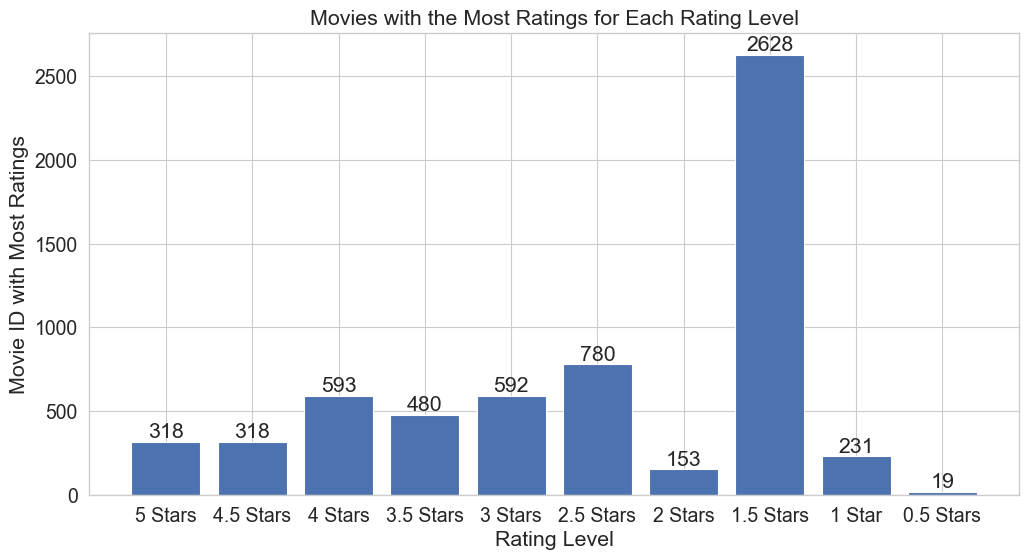

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#Group the data by 'movieId' and 'rating', and count the number of occurrences
rating_counts = data.groupby(['movieId', 'rating']).size().unstack(fill_value=0)


#Plot the results
plt.figure(figsize=(12, 6))

#Create a list of movie IDs for each rating level
movie_ids = [
    most_rated_movies_5stars,
    most_rated_movies_4halfstars,
    most_rated_movies_4stars,
    most_rated_movies_3halfstars,
    most_rated_movies_3stars,
    most_rated_movies_2halfstars,
    most_rated_movies_2stars,
    most_rated_movies_1halfstars,
    most_rated_movies_1star,
    most_rated_movies_0_5stars
]

#Create a list of rating levels for labeling
rating_levels = ['5 Stars', '4.5 Stars', '4 Stars', '3.5 Stars', '3 Stars','2.5 Stars',  '2 Stars','1.5 Stars',  '1 Star', '0.5 Stars']

#Create a bar plot
plt.bar(rating_levels, [movie_id for movie_id in movie_ids])
plt.xlabel('Rating Level')
plt.ylabel('Movie ID with Most Ratings')
plt.title('Movies with the Most Ratings for Each Rating Level')

#Add movie IDs as text inside the bars
for i, v in enumerate(movie_ids):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

The plots above give us a clear view of the rating values that movies with the most ratings tend to receive. It's evident that these popular movies often get a rating of 1.5, which is by far the most common choice. On the flip side, 0.5-star ratings are quite rare for these highly-rated movies.

# DENSITY PLOT FOR THE WHOLE DATASET

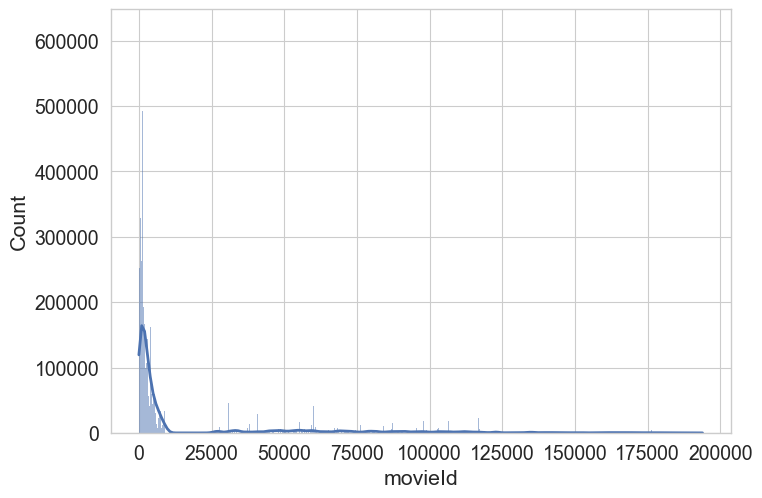

In [18]:
#A GLANCE IN MOVIE ID FOR THE INITIAL DATASET 'data'
def plot_density(data):
    fig, ax = plt.subplots(figsize=(8,5.5))
    plot = sns.histplot(data['movieId'], kde=True, ax=ax)

plot_density(data)

This density plot offers valuable insights into the distribution of movie IDs within the dataset, providing a clear depiction of their frequency. Notably, it becomes evident that movie IDs in the range of 0 to approximately 1000 are associated with a significantly higher occurrence of ratings.

# Stratification

We select to apply stratification sampling because the advantage lies in ensuring that all subgroups within the dataset are fairly represented in our sample, minimizing the risk of underrepresentation or bias. By dividing the dataset into strata and sampling from each, we can achieve greater precision, make informed subgroup comparisons, and allocate our resources efficiently.

More specifically, in this code, we utilize StratifiedShuffleSplit with 5 iterations to perform stratified random sampling on the original dataset named 'data', selecting a 0.1% random subset of the data in each iteration while maintaining the stratification based on movie ratings. The resulting sampled_data represents unique subsets of the original data, allowing for robust and representative analysis and insights from various perspectives.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

#First Stage Sampling
splitter = StratifiedShuffleSplit(n_splits=5, train_size=0.001, random_state=42)

for train_index, _ in splitter.split(data, data['rating']):
    sampled_data = data.iloc[train_index]

In [20]:
#A FIRST GLANCE IN THE SAMPLED DATA
sampled_data.head(-10)


,userId,movieId,rating
6513150,66948,1261,4.0
15630977,159601,588,3.0
4763201,48805,356,3.5
17060451,174336,223,4.0
11506118,117958,1222,4.5
...,...,...,...
24143323,246794,296,5.0
8115994,83525,27850,4.0
537813,5442,5989,4.0
10557926,108490,2105,3.0


# DESCRIPTIVE STATISTICS FOR COMPARISON BETWEEN THE ORIGINAL DATASET AND THE SAMPLED.

In [22]:
import numpy as np
import pandas as pd


#Calculate summary statistics for data
mean_data = data['rating'].mean()
median_data = data['rating'].median()
std_data = data['rating'].std()
min_data = data['rating'].min()
max_data = data['rating'].max()

#Calculate summary statistics for sampled_data
mean_sampled = sampled_data['rating'].mean()
median_sampled = sampled_data['rating'].median()
std_sampled = sampled_data['rating'].std()
min_sampled = sampled_data['rating'].min()
max_sampled = sampled_data['rating'].max()

#Display the summary statistics
print("Summary Statistics for 'data' Dataset:")
print(f"Mean: {mean_data}")
print(f"Median: {median_data}")
print(f"Standard Deviation: {std_data}")
print(f"Minimum: {min_data}")
print(f"Maximum: {max_data}\n")

print("Summary Statistics for 'sampled_data' Dataset:")
print(f"Mean: {mean_sampled}")
print(f"Median: {median_sampled}")
print(f"Standard Deviation: {std_sampled}")
print(f"Minimum: {min_sampled}")
print(f"Maximum: {max_sampled}")




Summary Statistics for 'data' Dataset:
Mean: 3.5304452124932677
Median: 3.5
Standard Deviation: 1.066352750231988
Minimum: 0.5
Maximum: 5.0

Summary Statistics for 'sampled_data' Dataset:
Mean: 3.5305372392173817
Median: 3.5
Standard Deviation: 1.0662825170809382
Minimum: 0.5
Maximum: 5.0


The provided results present summary statistics for both the original dataset and the sampled dataset. It is evident from the statistics that these two datasets exhibit a high degree of similarity, as indicated by nearly identical mean, standard deviation, and median values for the 'movieId' variable.

# CHECKING THE DISTRIBUTION OF RATINGS OF THE SAMPLED DATA COMPARED TO ORIGINAL DATA

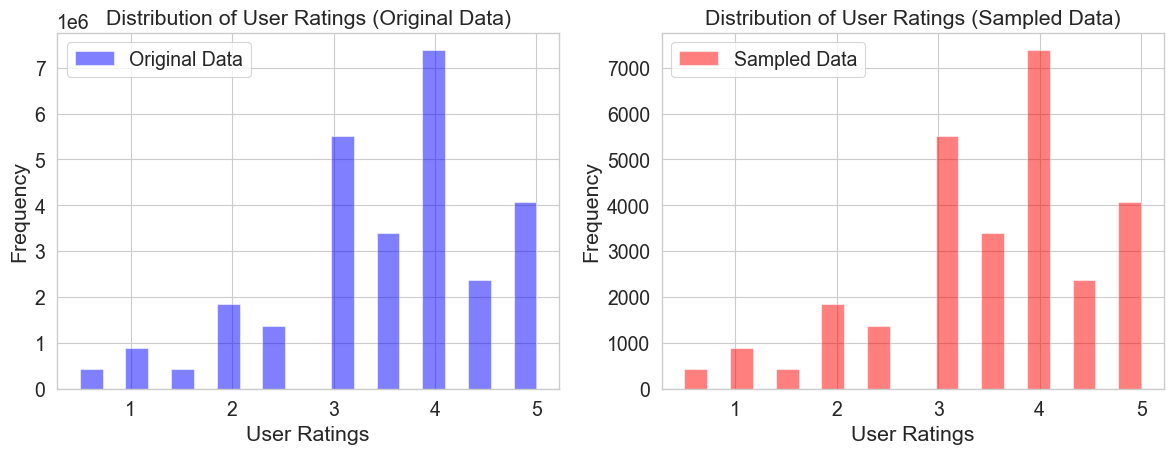

In [24]:
#IT FOLLOWS A COMPARISON IN SEPARATE PLOTS
import matplotlib.pyplot as plt

#Plot the distribution of user ratings in the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data['rating'], bins=20, color='blue', alpha=0.5, label='Original Data')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings (Original Data)')
plt.legend()

#Plot the distribution of user ratings in the sampled data
plt.subplot(1, 2, 2)
plt.hist(sampled_data['rating'], bins=20, color='red', alpha=0.5, label='Sampled Data')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings (Sampled Data)')
plt.legend()

plt.tight_layout()
plt.show()

In the plots above, we conduct a comparison between the original dataset and the sampled dataset. At first glance, the distributions appear remarkably similar, with the rating value of 4 being the most prevalent in both plots, and a rating of 1.5 being the least frequently observed in both datasets.

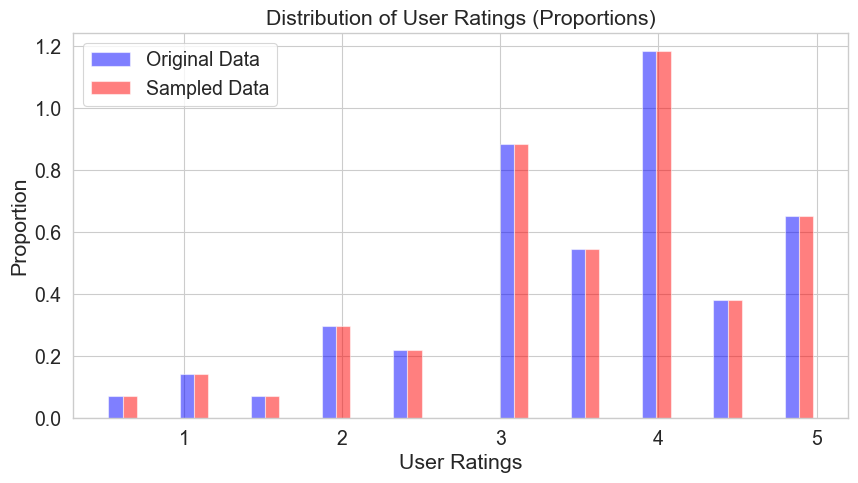

In [25]:
#IN THE SAME PLOT TO BE MORE VISIBLE
import matplotlib.pyplot as plt

#Create a list of user ratings from the original data and the sampled data
original_ratings = data['rating']
sample_ratings = sampled_data['rating']

#Combine the ratings into a single list for plotting
ratings = [original_ratings, sample_ratings]
labels = ['Original Data', 'Sampled Data']

#Plot the distribution of user ratings as proportions
plt.figure(figsize=(10, 5))
plt.hist(ratings, bins=20, color=['blue', 'red'], alpha=0.5, label=labels, density=True)
plt.xlabel('User Ratings')
plt.ylabel('Proportion')
plt.title('Distribution of User Ratings (Proportions)')
plt.legend()

plt.show()


The plots above demonstrate the similarity in the rating distribution between the two datasets.

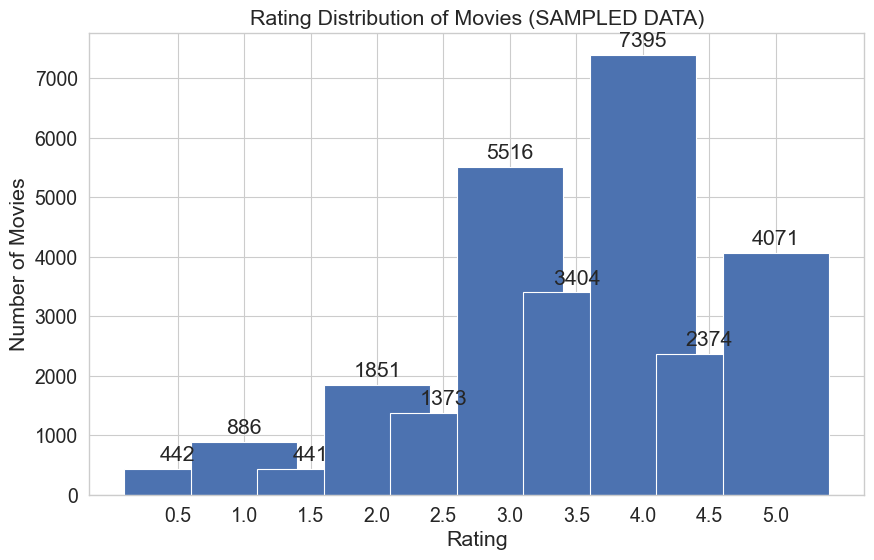

In [26]:
#Group the data by rating and count the movies in each group For sampled data
rating_counts = sampled_data['rating'].value_counts().sort_index()

#Create a bar plot with frequency labels
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Rating Distribution of Movies (SAMPLED DATA)')

#Add frequency labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',  
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xticks(rating_counts.index)
plt.show()

In the above plot, the rating distribution of movies in the sampled data is depicted. For each rating value, the plot reveals the count of movies associated with that rating. It is evident that a rating of 4.0 is the most common, while a rating of 1.5 is the least frequent. Notably, the distribution of the sampled data closely mirrors that of the initial dataset; however, the absolute number of movies for each rating category differs, reflecting the downsizing of the initial dataset to a 1/1000 scale in the sampled data.

# DENSITY PLOT FOR THE SAMPLED DATASET

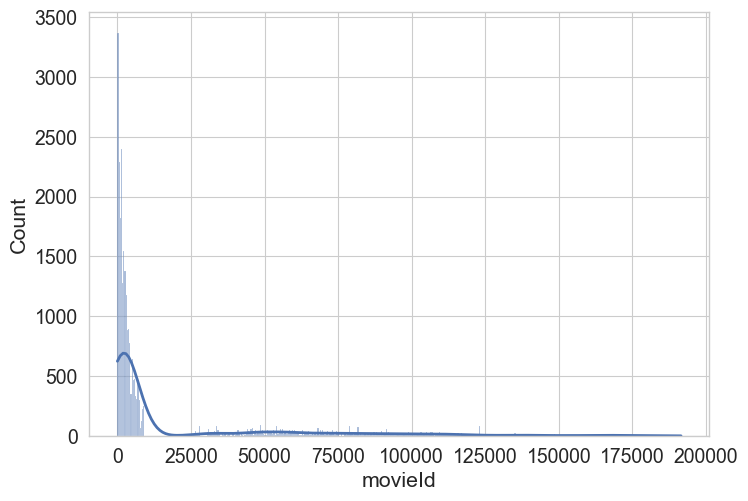

In [27]:
#A GLANCE IN MOVIEID FEATURE FOR THE SAMPLED DATASET
def plot_density(sampled_data):
    fig, ax = plt.subplots(figsize=(8,5.5))
    plot = sns.histplot(sampled_data['movieId'], kde=True, ax=ax)

plot_density(sampled_data)

The presented density plot offers insights into the frequency of movie ID appearances within the sampled data. Notably, it is evident that movie IDs within the range of 0 to nearly 1000 are associated with a higher frequency of ratings, signifying their prevalence within the dataset.

In [ ]:
(sampled_data.head(-10))

# KFOLD AND BASELINE MODEL

Following the assignment's  baseline model requirements, we have constructed a Normal Predictor model using the reduced dataset. Subsequently, we have conducted a rigorous 5-fold cross-validation process to obtain performance scores.

In [28]:
from surprise.model_selection.split import KFold
reader = Reader(rating_scale=(0.5, 5))

# Load the DataFrame into a Surprise dataset
new_data = Dataset.load_from_df(sampled_data[['userId', 'movieId', 'rating']], reader)

# Define cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Use the dataset with Surprise
cross_validate(NormalPredictor(), new_data, cv=cv, return_train_measures=True)

{'test_rmse': array([1.43649806, 1.45183685, 1.44684308, 1.47005742, 1.44626494]),
 'train_rmse': array([1.46081627, 1.45038352, 1.45447228, 1.45011052, 1.46127774]),
 'test_mae': array([1.15008033, 1.15328161, 1.15161956, 1.16372136, 1.15161892]),
 'train_mae': array([1.16531485, 1.1551112 , 1.15833834, 1.15518806, 1.16389648]),
 'fit_time': (0.019364356994628906,
  0.01800370216369629,
  0.02100372314453125,
  0.021507740020751953,
  0.025004863739013672),
 'test_time': (0.018508195877075195,
  0.017004013061523438,
  0.01900506019592285,
  0.019004344940185547,
  0.0180051326751709)}

# AVERAGE RMSE FOR THE BASELINE MODEL

In [43]:
# Example RMSE values for the 'NormalPredictor'
normal_rmse_values = [1.43649806, 1.45183685, 1.44684308, 1.47005742, 1.44626494]

# Calculate the average RMSE
average_normal_rmse = round(sum(normal_rmse_values) / len(normal_rmse_values),4)

# Print the average RMSE for 'NormalPredictor'
print("Average RMSE for NormalPredictor:", average_normal_rmse)

Average RMSE for NormalPredictor: 1.4503


# KNNWithZScore

KNNWithZScore is a collaborative filtering algorithm based on the K-nearest neighbors (KNN) approach, enhanced with Z-score normalization. It calculates recommendations by considering the similarity between users or items. Here are its parameters:

Parameters:

* k: Number of neighbors to consider.
* min_k: Minimum number of neighbors required for a prediction.
* sim_options: Similarity options, including similarity metric and user-based or item-based approaches.
* bsl_options: Baseline options for bias estimation

In [32]:
from surprise import KNNWithZScore
from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'k': [10, 15,20],  # Number of neighbors to consider
    'min_k': [1, 5],  # Minimum number of neighbors required
    'sim_options': {
        'name': ['pearson'],  # Similarity measure
        'user_based': [True, False]  # User-based or item-based
    }
}


# Perform a grid search with cross-validation
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['RMSE'], cv=cv)

# Fit the grid search to the data
grid_search.fit(new_data)

# Access the best parameters and best RMSE score
print("Best RMSE Score:", grid_search.best_score['rmse'])
print("Best Parameters:", grid_search.best_params['rmse'])

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Below we are implementing one more sampling which includes more data, as the training phase is not that computational expensive and we can take advantage of a bigger data size(0.05 compared to 0.001 of the fisrts sample)

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

# First Stage Sampling
splitters = StratifiedShuffleSplit(n_splits=5, train_size=0.05, random_state=42)

for train_index, _ in splitters.split(data, data['rating']):
    new_data_reduced = data.iloc[train_index]

reader = Reader(rating_scale=(0.5, 5))

# Load the DataFrame into a Surprise dataset
new_data_reduced = Dataset.load_from_df(new_data_reduced[['userId', 'movieId', 'rating']], reader)


In [36]:
cross_validate(KNNWithZScore(k=10, min_k=1,sim_options={'name': 'pearson', 'user_based': False}), new_data_reduced, cv=cv, return_train_measures=True)



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.97832171, 0.97851643, 0.98180215, 0.97785135, 0.97913704]),
 'train_rmse': array([0.73306023, 0.73282908, 0.73247677, 0.73351523, 0.73239027]),
 'test_mae': array([0.74134031, 0.74084038, 0.74397293, 0.74096116, 0.74206131]),
 'train_mae': array([0.53923319, 0.53915985, 0.53877663, 0.53960964, 0.53871238]),
 'fit_time': (51.99250340461731,
  47.20217752456665,
  42.75817513465881,
  43.17796230316162,
  43.11103701591492),
 'test_time': (9.878112554550171,
  10.84200143814087,
  9.434147596359253,
  9.050796270370483,
  10.341479063034058)}

# AVERAGE RMSE FOR THE KNNWithZScore MODEL

In [47]:
# Example RMSE values for the "KNN in new_data_reduced "
normal_rmse_valuesKNN = [0.97832171, 0.97851643, 0.98180215, 0.97785135, 0.97913704]

# Calculate the average RMSE
average_normal_rmseKNN = round(sum(normal_rmse_valuesKNN) / len(normal_rmse_valuesKNN),4)

# Print the average RMSE for 'NormalPredictor'
print("Average RMSE for KNNWithZScore:", average_normal_rmseKNN)

Average RMSE for KNNWithZScore: 0.9791


# Selection of parameters for KNNWithZScore

* About k (Number of neighbors):

>When we consider movie recommendations, it is crucial to focus on personalization to align with each viewer's interests. Selecting a small number of neighbors enhances the personalization of recommendations. It's this emphasis on personalized recommendations that underlines the reason for choosing a smaller number of neighbors in our project. By doing so, we aim to create movie suggestions that closely match individual viewer preferences and interests, ultimately improving the overall recommendation quality



* About min_k:

>In our research project, a smaller min_k value is advantageous. We focus on user movie ratings to provide tailored film recommendations based on individual preferences and rating history. With a smaller min_k, even newcomers with limited ratings can receive valuable suggestions. This ensures inclusivity, making the system suitable for all users. Additionally, it prevents irrelevant recommendations for newcomers, enhancing precision and personalization for all users, regardless of their rating history

* About sim_options-name:

>In our project, we decided to stick with Pearson correlation as our primary similarity measure, leaving out cosine similarity. We made this decision because cosine similarity can be touchy when it comes to users' unique rating habits. It might not give as personalized recommendations, missing the distinctions in how users rate movies, such as overrating some films. Focusing on Pearson correlation helps us deal with these variations, resulting in more personal and suitable recommendations that align with our project's objectives.

* About user_based:

> In our project, the user_based hyperparameter plays a crucial role in optimizing our recommendation system. We experiment with two settings, 'True' and 'False,' to strike a balance between user-focused and movie-focused recommendation strategies. The 'user-based' approach tailors movie suggestions to individual users by considering the preferences and behaviors of similar users, resulting in highly personalized recommendations. On the other hand, the 'item-based' approach relies on movie attributes for making suggestions. By exploring both options, we seek to identify the most effective recommendation approach for our dataset. This allows us to enhance the user experience and elevate the quality of our movie recommendations.

# Conclusion of the KNNWithZScore hyperparameter phase

> In our project, the selection of hyperparameters for the KNNWithZScore model is fine-tuned to match the dataset's characteristics and complexity. We opt for a moderate number of neighbors (k), a small minimum number of neighbors required (min_k), and versatile similarity measures (sim_options) to strike a balance between recommendation accuracy and efficiency. Our user-based vs. item-based exploration ensures that users receive tailored and precise movie suggestions, accommodating diverse preferences. This approach guarantees that all users, regardless of their varying movie tastes, benefit from relevant and personalized movie recommendations.

# SVD++

SVD++ (Singular Value Decomposition Plus Plus) is a matrix factorization-based recommendation algorithm that extends traditional SVD (Singular Value Decomposition) to improve recommendation accuracy. It accounts for both explicit and implicit user-item interactions, providing more accurate and personalized recommendations.

SVD++ uses these parameters to find the best factorization of the user-item interaction matrix while optimizing prediction accuracy. By considering both explicit ratings and implicit feedback, SVD++ provides a comprehensive approach to personalized recommendation. The optimal values of these parameters depend on the specific dataset and problem you are addressing, so they often need to be tuned through experimentation and cross-validation to achieve the best results.

Parameters:
* n_factors: Number of latent factors.
* n_epochs: Number of training iterations.
* lr_all: Learning rate for parameter updates.
* reg_all: Regularization term for all parameters.
* biased: Whether to use bias terms in the model.

In the below section we will build a SVD++ model, which will be tunning in a small fraction of the sample which is 0,0001. After the tunning, the models is being trained in a bigger fraction of the data set which is 0,05. Finally, the selection of the parameters and the values of those based on the hyperparameter tunning is summarizes for better uunderstanding.

In [38]:
from surprise import SVDpp
from surprise.model_selection import GridSearchCV, KFold
from surprise import Dataset, Reader

# Define cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the parameter grid for SVD++
param_grid_svdpp = {
    'n_factors': [10, 20, 50, 100],  # Number of factors to consider
    'n_epochs': [10, 20, 50, 100],  # Number of iterations
    'lr_all': [0.002, 0.005, 0.01, 0.1],  # Learning rate for all parameters
    'reg_all': [0.02,0.06, 0.1],  # Regularization term for all parameters
}

# Perform a grid search with cross-validation for SVD++ on the small dataset
grid_search_svdpp = GridSearchCV(SVDpp, param_grid_svdpp, measures=['RMSE'], cv=cv)
grid_search_svdpp.fit(new_data)

# Access the best parameters for SVD++
print("Best RMSE Score:", grid_search_svdpp.best_score['rmse'])
best_params_svdpp = grid_search_svdpp.best_params['rmse']
print("Best Parameters for SVD++:", best_params_svdpp)



Best Parameters for SVD++: {'n_factors': 10, 'n_epochs': 50, 'lr_all': 0.005, 'reg_all': 0.06}


In [39]:
cross_validate(SVDpp(n_factors=10,n_epochs=50 ,lr_all=0.005,reg_all=0.1), new_data_reduced, cv=cv, return_train_measures=True)


{'test_rmse': array([0.90896072, 0.9080382 , 0.91098376, 0.90905849, 0.90889176]),
 'train_rmse': array([0.79105919, 0.79151175, 0.79071225, 0.79046932, 0.79107203]),
 'test_mae': array([0.69803994, 0.69745191, 0.699582  , 0.69912993, 0.69841678]),
 'train_mae': array([0.61006574, 0.61033882, 0.60954152, 0.6094708 , 0.60962881]),
 'fit_time': (48.512327909469604,
  49.41857314109802,
  49.041600942611694,
  49.040143728256226,
  48.71436834335327),
 'test_time': (8.739307403564453,
  8.42552375793457,
  8.319670677185059,
  7.98655104637146,
  8.896208763122559)}

# AVERAGE RMSE FOR THE SVD++ MODEL

In [40]:
# Example RMSE values for the 'SVD++'
normal_rmse_valuesSVD = [0.90896072, 0.9080382 , 0.91098376, 0.90905849, 0.90889176]

# Calculate the average RMSE
average_normal_rmseSVD = sum(normal_rmse_valuesSVD) / len(normal_rmse_valuesSVD)

# Print the average RMSE for 'NormalPredictor'
print("Average RMSE for SVDpp:", average_normal_rmseSVD)

Average RMSE for SVDpp: 0.909186586


# Selection of parameters for SVD++

* About n_factors:

>This parameter determines the number of latent factors that are used to represent users and items in the model. These factors capture underlying patterns in the data, allowing the model to learn user preferences and item characteristics.
The number of latent factors, in this context, plays a crucial role in capturing the underlying patterns in user preferences and movie characteristics. For a large dataset with 53,889 unique movies and 283,228 users, selecting a moderate number of latent factors (e.g., 10 to 50) balances the model's capacity to learn complex patterns and the computational complexity. A smaller value might indicate that the dataset doesn't contain enough diverse information to benefit from a larger latent space, while a larger value might lead to computational challenges.



* About n_epochs:

>This parameter determines the number of iterations used in the optimization process. Each iteration refines the model's understanding of the data and adjusts the internal parameters to minimize the prediction error.

>The number of iterations influences how well the model adapts to the data. Consistently getting n_epochs = 50 suggests that, for this dataset, this number of iterations provides a balance between refining the model's understanding of the data and computational efficiency. A larger number might risk overfitting, while a smaller number might not allow the model to converge to an optimal solution.

* About lr_rate:

>The learning rate (lr) is chosen as a hyperparameter because it controls the step size at which a machine learning model updates its internal parameters during training. It is a crucial parameter to fine-tune because the right learning rate can significantly impact the model's convergence and performance.A higher learning rate can lead to faster convergence, but it can also cause the algorithm to overshoot the optimal solution 

>A learning rate of 0.005 is chosen to prevent overly large updates that can lead to instability or divergence during training. It strikes a balance between fast convergence and model stability, which is crucial for a large dataset with diverse user preferences.

* About reg_all:

> The 'reg_all' parameter is the regularization term for all model parameters. A 'reg_all' value of 0.1 indicates that relatively strong regularization is applied to prevent overfitting. This regularization term penalizes large values of model parameters during training, enhancing generalization performance and preventing overfitting.

# Conclusion of the SVD++ hyperparameter phase

> In summary, the choice of parameters for the SVD++ model is tailored to the dataset's size and complexity. A moderate number of latent factors, a moderate number of iterations, a moderate learning rate, and strong regularization are employed to balance model capacity, convergence, and stability for highly personalized and accurate movie recommendations. This approach ensures that users receive relevant suggestions regardless of their diverse movie preferences.

In [44]:
print('Average RMSE NormalPredictor:', round(np.mean(average_normal_rmse), 4))
print('Average RMSE KNNWithZscores:', round(np.mean(normal_rmse_valuesKNN), 4))
print('Average RMSE for SVDpp:', round(np.mean(normal_rmse_valuesSVD), 4))

Average RMSE NormalPredictor: 1.4503
Average RMSE KNNWithZscores: 0.9791
Average RMSE for SVDpp: 0.9092


# General conclusion

After evaluating two distinct recommendation models, one inspired by KNN and another matrix factorization-based approach, and comparing their performance against the baseline model, it becomes evident that selecting appropriate hyperparameters can significantly enhance recommendation systems. The comparative analysis of RMSE values demonstrates the impact of these hyperparameter choices on predictive accuracy. In our findings, SVDpp emerges as the top-performing model among the three, boasting the lowest RMSE. This observation underscores the effectiveness of matrix factorization techniques in capturing complex user-movie interactions, further validating the benefits of hyperparameter tuning in optimizing recommendation systems.